# Support Vector Machine

## Section 1: Data Importing

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df_matches = pd.read_csv('com.csv')
df_matches.dtypes

Date            object
HomeTeam        object
AwayTeam        object
FTHG             int64
FTAG             int64
FTR             object
HTHG             int64
HTAG             int64
HTR             object
Referee         object
HS               int64
AS               int64
HST              int64
AST              int64
HC               int64
AC               int64
HF               int64
AF               int64
HY               int64
AY               int64
HR               int64
AR               int64
Unnamed: 22    float64
Unnamed: 23    float64
dtype: object

In [ ]:
# Importing Data File
df_matches = pd.read_csv('com.csv')
df_managers = pd.read_excel('PremierLeagueManagers.xlsx')

# Ensure the match date is in datetime format
df_matches['Date'] = pd.to_datetime(df_matches['Date'],dayfirst = True)

# Sort the df_matches dataframe by ascending date order
df_matches = df_matches.sort_values(by='Date', ascending=True).reset_index(drop=True)

# Drop any rows where all the values are nan
df_matches = df_matches.dropna()

# Ensure Season_Start and Season_End are in datetime format
df_managers['Season_Start'] = pd.to_datetime(df_managers['Season_Start'],dayfirst = True)
df_managers['Season_End'] = pd.to_datetime(df_managers['Season_End'],dayfirst = True)

#Showing What Each Training Dataset Looks Like
display(df_matches)
display(df_managers)

df_matches.dtypes

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,2024-05-19,Brighton,Man United,0.0,2.0,A,0.0,0.0,D,C Pawson,...,3.0,4.0,10.0,9.0,7.0,5.0,1.0,3.0,0.0,0.0
9216,2024-05-19,Brentford,Newcastle,2.0,4.0,A,0.0,3.0,A,S Hooper,...,5.0,7.0,15.0,11.0,3.0,0.0,4.0,4.0,0.0,0.0
9217,2024-05-19,Arsenal,Everton,2.0,1.0,H,1.0,1.0,D,M Oliver,...,5.0,2.0,8.0,11.0,8.0,1.0,4.0,3.0,0.0,0.0
9218,2024-05-19,Burnley,Nott'm Forest,1.0,2.0,A,0.0,2.0,A,G Scott,...,3.0,6.0,11.0,5.0,4.0,3.0,1.0,0.0,0.0,0.0


,Season_Start,Season_End,Manager,Club,Manager_Nationality
0,2024-08-16,2025-05-25,Mikel Arteta,Arsenal,Spain
1,2024-08-16,2025-05-25,Unai Emery,Aston Villa,Spain
2,2024-08-16,2025-05-25,Andoni Iraola,Bournemouth,Spain
3,2024-08-16,2025-05-25,Thomas Frank,Brentford,Denmark
4,2024-08-16,2025-05-25,Fabian Hürzeler,Brighton,Germany
...,...,...,...,...,...
696,2000-08-19,2001-05-19,David Pleat,Tottenham,England
697,2000-08-19,2001-05-19,George Graham,Tottenham,Scotland
698,2000-08-19,2001-05-19,Glenn Hoddle,Tottenham,England
699,2000-08-19,2001-05-19,Glenn Roeder,West Ham,England


Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG               float64
FTAG               float64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
Referee             object
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

In [4]:
df_matches.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [5]:
# Checking the distribution of FTR Values
print(df_matches['FTR'].value_counts()) # Raw values
print(df_matches['FTR'].value_counts(normalize=True)*100) # Percentage of the results being H, A, or D

FTR
H    4238
A    2707
D    2275
Name: count, dtype: int64
FTR
H    45.965293
A    29.360087
D    24.674620
Name: proportion, dtype: float64


## Section 2: Combining the Different Data Sources Together

The next section is to stitch the manager information to the main dataframe.

In [6]:
# Function to get the manager for a specific team and match date
def get_manager(team, match_date):
    manager_row = df_managers[
        (df_managers['Club'] == team) &
        (df_managers['Season_Start'] <= match_date) &
        (df_managers['Season_End'] >= match_date)
    ]
    return manager_row['Manager'].iloc[0] if not manager_row.empty else None

# Add HomeManager and AwayManager columns to df_matches
df_matches['HomeManager'] = df_matches.apply(lambda row: get_manager(row['HomeTeam'], row['Date']), axis=1)
df_matches['AwayManager'] = df_matches.apply(lambda row: get_manager(row['AwayTeam'], row['Date']), axis=1)

## Section 3: Calculating Input Features for ML Model
### Section 3.1: Calculating Rolling Average Statistics

In [7]:
# Calculating Rolling Average Statistics
k = 38 # Number of matches to look backwards to.

# Function to Calculate Rolling Average Statistics for the Past k Matches. Each row's kAvg does not include the current results.
def generate_kAvg(df, attribute, HomeTeam=True):
    if HomeTeam:
        group_by_team = "HomeTeam"
    elif not HomeTeam:
        group_by_team = "AwayTeam"
    
    kattribute = "k" + attribute
    df[kattribute] = (
    df.groupby(group_by_team)[attribute]     # Group by HomeTeam or AwayTeam
    .transform(lambda x: x.shift(1).rolling(window=k, min_periods=1).mean())  # Shift by 1 to exclude the current match, and create a rolling window of up to k past matches
    )
    df[kattribute] = df[kattribute].fillna(0) # Filling nan values with 0

Home_kAvg_features = ['FTHG','HTHG','HS','HC','HF','HY','HR']
Away_kAvg_features = ['FTAG','HTAG','AS','AC','AF','AY','AR']

for feature in Home_kAvg_features:
    generate_kAvg(df_matches, feature,True)
for feature in Away_kAvg_features:
    generate_kAvg(df_matches, feature,False)
    
display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,kHF,kHY,kHR,kFTAG,kHTAG,kAS,kAC,kAF,kAY,kAR
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,2024-05-19,Brighton,Man United,0.0,2.0,A,0.0,0.0,D,C Pawson,...,9.552632,1.815789,0.052632,1.263158,0.684211,12.947368,7.842105,7.315789,2.157895,0.026316
9216,2024-05-19,Brentford,Newcastle,2.0,4.0,A,0.0,3.0,A,S Hooper,...,7.263158,1.736842,0.052632,1.868421,0.815789,11.815789,7.789474,8.184211,2.052632,0.000000
9217,2024-05-19,Arsenal,Everton,2.0,1.0,H,1.0,1.0,D,M Oliver,...,8.078947,1.263158,0.026316,0.947368,0.368421,10.947368,8.210526,8.421053,2.289474,0.078947
9218,2024-05-19,Burnley,Nott'm Forest,1.0,2.0,A,0.0,2.0,A,G Scott,...,8.236842,1.473684,0.052632,0.894737,0.473684,9.710526,8.000000,7.868421,2.394737,0.052632


### Section 3.2 Calculating Cumulative Win Rates for the Home and Away Team

In [8]:
# Create a new column to store home wins and away wins
df_matches['HomeWin'] = (df_matches['FTR'] == 'H').astype(int)
df_matches['AwayWin'] = (df_matches['FTR'] == 'A').astype(int)

# Calculate rolling win rate for home games
df_matches['HomeWinRate'] = (
    df_matches.groupby('HomeTeam')['HomeWin']    # Group by HomeTeam
    .cumsum()                                    # Cumulative sum of home wins
    / df_matches.groupby('HomeTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)

# Calculate rolling win rate for away games
df_matches['AwayWinRate'] = (
    df_matches.groupby('AwayTeam')['AwayWin']    # Group by AwayTeam
    .cumsum()                                    # Cumulative sum of away wins
    / df_matches.groupby('AwayTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)

# Display relevant columns
display(df_matches)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,kHTAG,kAS,kAC,kAF,kAY,kAR,HomeWin,AwayWin,HomeWinRate,AwayWinRate
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1.000000,0.000000
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1.000000,0.000000
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0.000000,1.000000
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,2024-05-19,Brighton,Man United,0.0,2.0,A,0.0,0.0,D,C Pawson,...,0.684211,12.947368,7.842105,7.315789,2.157895,0.026316,0,1,0.345324,0.513043
9216,2024-05-19,Brentford,Newcastle,2.0,4.0,A,0.0,3.0,A,S Hooper,...,0.815789,11.815789,7.789474,8.184211,2.052632,0.000000,0,1,0.370968,0.248227
9217,2024-05-19,Arsenal,Everton,2.0,1.0,H,1.0,1.0,D,M Oliver,...,0.368421,10.947368,8.210526,8.421053,2.289474,0.078947,1,0,0.679654,0.266811
9218,2024-05-19,Burnley,Nott'm Forest,1.0,2.0,A,0.0,2.0,A,G Scott,...,0.473684,9.710526,8.000000,7.868421,2.394737,0.052632,0,1,0.306818,0.136364


### Section 3.3: Generating Rolling Average Statistics for this Specific Particular Home and Away Combination

In [9]:
n = 5; # Number of matches to look back for this particular home and away pair

def generate_nAvg_pairwise(df, row, attribute):
    # Getting the matches with the current row's home and away team lineup
    matches = df[ (df['HomeTeam'] == row['HomeTeam']) & (df['AwayTeam'] == row['AwayTeam']) ]
    
    # Get the current index of the row
    current_index = row.name
    
    # Get previous matches before this match
    previous_matches = matches[matches.index < current_index]
    
    return (
        previous_matches[attribute]
        .rolling(window=n, min_periods=1)
        .mean()
        .iloc[-1]  # Get the latest rolling average value
        if not previous_matches.empty
        else 0  # Default value for no previous matches
    )

In [10]:
# List of attributes to calculate team pair specific rolling averages for
attributes = ['FTHG','HTHG','HS','HC','HF','HY','HR',
              'FTAG','HTAG','AS','AC','AF','AY','AR']

for attribute in attributes:
    # Defining new columns for the specific combination
    new_column = f"n{attribute}_Pairwise"
    df_matches[new_column] = df_matches.apply(
        lambda row: generate_nAvg_pairwise(df_matches, row, attribute), axis = 1
    )


In [11]:
# Showing what columns are present in the current dataframe
df_matches.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF',
       'HY', 'AY', 'HR', 'AR', 'HomeManager', 'AwayManager', 'kFTHG', 'kHTHG',
       'kHS', 'kHC', 'kHF', 'kHY', 'kHR', 'kFTAG', 'kHTAG', 'kAS', 'kAC',
       'kAF', 'kAY', 'kAR', 'HomeWin', 'AwayWin', 'HomeWinRate', 'AwayWinRate',
       'nFTHG_Pairwise', 'nHTHG_Pairwise', 'nHS_Pairwise', 'nHC_Pairwise',
       'nHF_Pairwise', 'nHY_Pairwise', 'nHR_Pairwise', 'nFTAG_Pairwise',
       'nHTAG_Pairwise', 'nAS_Pairwise', 'nAC_Pairwise', 'nAF_Pairwise',
       'nAY_Pairwise', 'nAR_Pairwise'],
      dtype='object')

### Section 3.3: Label Encoding the Categorical Columns for Use in the Machine Learning Model

Input features that needs to be encoded:
1. HomeTeam
2. AwayTeam
3. FTR
4. HTR
5. Referee
6. HomeManager
7. AwayManager

In [12]:
# Team Names
le_teams = LabelEncoder()

# Using the same label encoder for the home and away teams.
le_teams.fit(pd.concat([df_matches['HomeTeam'],df_matches['AwayTeam']])) 

# Using the label encoder to encode the home and away teams
df_matches['HomeTeam_Encoded'] = le_teams.transform(df_matches['HomeTeam'])
df_matches['AwayTeam_Encoded'] = le_teams.transform(df_matches['AwayTeam'])

# FTR and HTR
le_results = LabelEncoder()
le_results.fit(pd.concat([df_matches['FTR'],df_matches['HTR']]))

# Using the label encoder to encode the FTR and HTR
df_matches['FTR_Encoded'] = le_results.transform(df_matches['FTR'])
df_matches['HTR_Encoded'] = le_results.transform(df_matches['HTR'])

# Referee
le_referee = LabelEncoder()
le_referee.fit(df_matches['Referee'])

df_matches['Referee_Encoded'] = le_referee.transform(df_matches['Referee'])

# Managers
le_managers = LabelEncoder() 
le_managers.fit(pd.concat([df_matches['HomeManager'],df_matches['AwayManager']]))
df_matches['HomeManager_Encoded'] = le_managers.transform(df_matches['HomeManager'])
df_matches['AwayManager_Encoded'] = le_managers.transform(df_matches['AwayManager'])

display(df_matches)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise,HomeTeam_Encoded,AwayTeam_Encoded,FTR_Encoded,HTR_Encoded,Referee_Encoded,HomeManager_Encoded,AwayManager_Encoded
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,0.000000,0.000000,0.0,12,26,2,2,143,2,75
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,0.000000,0.000000,0.0,13,43,2,2,65,29,58
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,0.000000,0.000000,0.0,14,28,0,1,19,59,158
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,0.000000,0.000000,0.0,16,36,1,0,12,74,154
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,0.000000,0.000000,0.0,22,17,2,2,46,35,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,2024-05-19,Brighton,Man United,0.0,2.0,A,0.0,0.0,D,C Pawson,...,12.200000,2.000000,0.0,9,27,0,1,24,130,46
9216,2024-05-19,Brentford,Newcastle,2.0,4.0,A,0.0,3.0,A,S Hooper,...,11.000000,0.500000,0.0,8,29,0,0,151,159,43
9217,2024-05-19,Arsenal,Everton,2.0,1.0,H,1.0,1.0,D,M Oliver,...,11.000000,2.200000,0.0,0,17,2,1,95,103,143
9218,2024-05-19,Burnley,Nott'm Forest,1.0,2.0,A,0.0,2.0,A,G Scott,...,0.000000,0.000000,0.0,10,31,0,0,59,166,108


## Section 4: Separating the DataFrame into Input and Output Features

### Section 4.1: Selecting the Input and Output Features of the Model

In [13]:
input_features = ['HomeTeam_Encoded','AwayTeam_Encoded','HomeManager_Encoded',
                 'AwayManager_Encoded','Referee_Encoded','kFTHG', 'kHTHG','kHS', 'kHC', 'kHF', 'kHY', 
                  'kHR', 'kFTAG', 'kHTAG', 'kAS', 'kAC', 'kAF', 'kAY', 'kAR', 
                  'HomeWinRate', 'AwayWinRate', 
                  'nFTHG_Pairwise', 'nHTHG_Pairwise', 'nHS_Pairwise', 'nHC_Pairwise',
                   'nHF_Pairwise', 'nHY_Pairwise', 'nHR_Pairwise', 'nFTAG_Pairwise',
                   'nHTAG_Pairwise', 'nAS_Pairwise', 'nAC_Pairwise', 'nAF_Pairwise',
                   'nAY_Pairwise', 'nAR_Pairwise']
df_input = df_matches[input_features]
display(df_input)

,HomeTeam_Encoded,AwayTeam_Encoded,HomeManager_Encoded,AwayManager_Encoded,Referee_Encoded,kFTHG,kHTHG,kHS,kHC,kHF,...,nHF_Pairwise,nHY_Pairwise,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise
0,12,26,2,75,143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,13,43,29,58,65,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,14,28,59,158,19,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,16,36,74,154,12,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,22,17,35,168,46,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9215,9,27,130,46,24,1.973684,0.868421,17.552632,9.500000,9.552632,...,13.400000,1.8,0.0,1.600000,0.8,11.800000,4.600000,12.200000,2.000000,0.0
9216,8,29,159,43,151,1.605263,0.763158,13.289474,6.631579,7.263158,...,9.500000,1.5,0.5,2.000000,1.0,18.000000,5.500000,11.000000,0.500000,0.0
9217,0,17,103,143,95,2.631579,1.000000,17.921053,8.842105,8.078947,...,11.000000,0.6,0.0,0.800000,0.6,9.600000,3.600000,11.000000,2.200000,0.0
9218,10,31,166,108,59,1.000000,0.447368,12.052632,7.710526,8.236842,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [14]:
output_features = ['FTR_Encoded']
df_output = df_matches['FTR_Encoded']
display(df_output)

0       2
1       2
2       0
3       1
4       2
       ..
9215    0
9216    0
9217    2
9218    0
9219    0
Name: FTR_Encoded, Length: 9220, dtype: int32

### Section 4.3: Checking the Correlation Between Each Input Feature With Respect to FTR_Encoded

In [15]:
#Checking correlation Matrix
correlation_matrix = pd.concat([df_input, df_output], axis=1).corr()

sorted_correlation = correlation_matrix['FTR_Encoded'].abs().sort_values(ascending = False)

display(sorted_correlation)

FTR_Encoded            1.000000
HomeWinRate            0.310830
AwayWinRate            0.299105
kFTHG                  0.246141
kFTAG                  0.244414
kAS                    0.242155
kHTHG                  0.222297
kHS                    0.213647
kHTAG                  0.212902
kAC                    0.185228
kHC                    0.174246
nAS_Pairwise           0.161254
nFTAG_Pairwise         0.158316
nFTHG_Pairwise         0.134619
nHTAG_Pairwise         0.128917
nAC_Pairwise           0.116294
kHY                    0.113854
nHS_Pairwise           0.112690
nHTHG_Pairwise         0.108252
nHC_Pairwise           0.095534
nHY_Pairwise           0.094907
HomeManager_Encoded    0.072724
AwayTeam_Encoded       0.063788
kAF                    0.057762
kHF                    0.054809
AwayManager_Encoded    0.053659
HomeTeam_Encoded       0.052138
nHF_Pairwise           0.042426
kHR                    0.025925
nHR_Pairwise           0.024439
Referee_Encoded        0.023756
nAY_Pair

### Section 4.4: Splitting the Dataset into Training and Test Datasets

In [16]:
#Splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
testing_size = 0.33
input_train, input_test, output_train, output_test = train_test_split(df_input, df_output, test_size=testing_size, random_state=42)

### Section 4.5: Scaling the Input and Test Datasets

In [17]:
# Scaling the input training and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

input_train_scaled = scaler.fit_transform(input_train)
input_test_scaled = scaler.transform(input_test)


### Section 4.6: Training the Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# Creating an array of numbers from 0 to 1 which can be iterated through to change the ratio of l1 vs l2 regularisation
l1_component = np.arange(0,1,0.01)

# Creates an empty list to hold the weighted f1 scores at each l1 component for train and test data
f1_train_lst = []
f1_test_lst = [] 

for l1 in l1_component:
    clf = LogisticRegression(penalty= 'elasticnet', l1_ratio = l1, solver = 'saga', max_iter = 5000)
    # Training the Classifier
    clf = clf.fit(input_train_scaled, output_train)
    
    pred_test = clf.predict(input_test_scaled) # Prediction using the test split of the data
    pred_train = clf.predict(input_train_scaled) # Prediction using the train split of the data
    
    f1_test = f1_score(output_test, pred_test, average='weighted')
    f1_train = f1_score(output_train, pred_train, average = 'weighted')
    
    f1_train_lst.append(f1_train)
    f1_test_lst.append(f1_test)

Text(0.5, 1.0, 'Effect of $l_1$ Ratio on F1 Score of a Multinomial Logistic Regression with Elastic Net Regularisation')

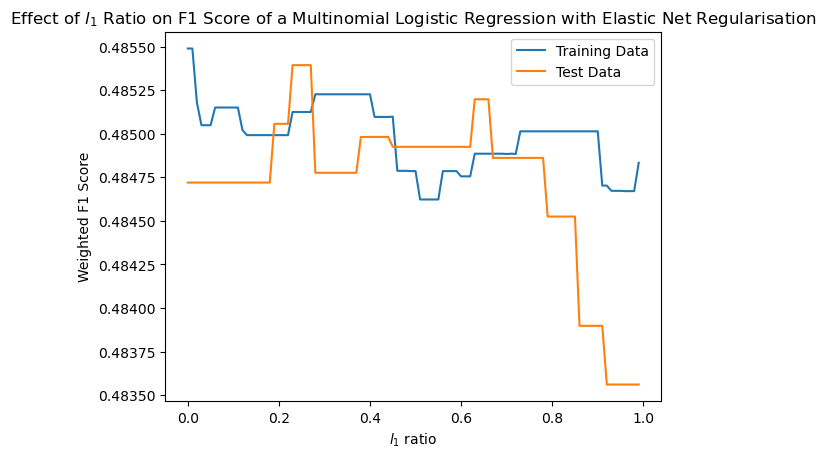

In [19]:
plt.plot(l1_component, f1_train_lst)
plt.plot(l1_component, f1_test_lst)
plt.legend(['Training Data','Test Data'])
plt.xlabel('$l_1$ ratio')
plt.ylabel('Weighted F1 Score')
plt.title('Effect of $l_1$ Ratio on F1 Score of a Multinomial Logistic Regression with Elastic Net Regularisation')

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty= 'elasticnet', l1_ratio = 0.25, solver = 'saga', max_iter = 5000)
# Training the Classifier
clf = clf.fit(input_train_scaled, output_train)

### Section 4.7: Evaluating the Performance of the Logistic Regression Model using the Test Dataset

In [21]:
from sklearn.metrics import classification_report
output_pred = clf.predict(input_test_scaled)

output_test = le_results.inverse_transform(output_test)
output_pred = le_results.inverse_transform(output_pred)

# Transforming Back Into Human Understandable Results
print(classification_report(output_test, output_pred))

              precision    recall  f1-score   support

           A       0.51      0.51      0.51       874
           D       0.34      0.06      0.10       745
           H       0.57      0.82      0.67      1424

    accuracy                           0.54      3043
   macro avg       0.47      0.46      0.43      3043
weighted avg       0.50      0.54      0.49      3043



### Section 4.8: Predicting the Match Results for the 2024-25 Season

In [22]:
# Importing the matches that needs to be predicted
df_test = pd.read_csv('epl-test.csv')

# Ensure the match date is in datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'], dayfirst = True)


# Number of rows of the df_test dataframe
test_rows = len(df_test.index)

df_test.head()

C:\Users\chenh\AppData\Local\Temp\ipykernel_32104\2338619528.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Date'] = pd.to_datetime(df_test['Date'], dayfirst = True)


,Date,HomeTeam,AwayTeam
0,2025-02-01,AFC Bournemouth,Liverpool
1,2025-02-01,Arsenal,Man City
2,2025-02-01,Brentford,Spurs
3,2025-02-01,Chelsea,West Ham
4,2025-02-01,Everton,Leicester City


In [23]:
# Replacing the inconsistent team names with the team names used previously
df_test.replace(to_replace = 'AFC Bournemouth', value= 'Bournemouth', inplace = True)
df_test.replace(to_replace = 'Ipswich Town', value= 'Ipswich', inplace = True)
df_test.replace(to_replace = 'Man Utd', value= 'Man United', inplace = True)
df_test.replace(to_replace = 'Nottingham Forest', value= "Nott'm Forest", inplace = True)
df_test.replace(to_replace = 'Leicester City', value= "Leicester", inplace = True)
df_test.replace(to_replace = 'Spurs', value= "Tottenham", inplace = True)

In [24]:
# Add HomeManager and AwayManager columns to df_test
df_test['HomeManager'] = df_test.apply(lambda row: get_manager(row['HomeTeam'], row['Date']), axis=1)
df_test['AwayManager'] = df_test.apply(lambda row: get_manager(row['AwayTeam'], row['Date']), axis=1)
display(df_test)

,Date,HomeTeam,AwayTeam,HomeManager,AwayManager
0,2025-02-01,Bournemouth,Liverpool,Andoni Iraola,Arne Slot
1,2025-02-01,Arsenal,Man City,Mikel Arteta,Pep Guardiola
2,2025-02-01,Brentford,Tottenham,Thomas Frank,Ange Postecoglou
3,2025-02-01,Chelsea,West Ham,Enzo Maresca,Julen Lopetegui
4,2025-02-01,Everton,Leicester,Sean Dyche,Steve Cooper
5,2025-02-01,Ipswich,Southampton,Kieran McKenna,Russell Martin
6,2025-02-01,Man United,Crystal Palace,Ruben Filipe Marques Diogo Amorim,Oliver Glasner
7,2025-02-01,Newcastle,Fulham,Eddie Howe,Marco Alexandre Saraiva da Silva
8,2025-02-01,Nott'm Forest,Brighton,Nuno Herlander Simões Espírito Santo,Fabian Hürzeler
9,2025-02-01,Wolves,Aston Villa,Gary O'Neil,Unai Emery


In [25]:
# Merge df_test into df_matches 
merged_data = pd.concat([df_matches,df_test]) # data

# Generating kAvg Statistics
for feature in Home_kAvg_features:
    generate_kAvg(merged_data, feature,True)
for feature in Away_kAvg_features:
    generate_kAvg(merged_data, feature,False)

    
# Create a new column to store home wins and away wins
merged_data['HomeWin'] = (merged_data['FTR'] == 'H').astype(int)
merged_data['AwayWin'] = (merged_data['FTR'] == 'A').astype(int)

# Calculate rolling win rate for home games
merged_data['HomeWinRate'] = (
    merged_data.groupby('HomeTeam')['HomeWin']    # Group by HomeTeam
    .cumsum()                                    # Cumulative sum of home wins
    / merged_data.groupby('HomeTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)

# Calculate rolling win rate for away games
merged_data['AwayWinRate'] = (
    merged_data.groupby('AwayTeam')['AwayWin']    # Group by AwayTeam
    .cumsum()                                    # Cumulative sum of away wins
    / merged_data.groupby('AwayTeam').cumcount()  # Divide by cumulative games played
    .add(1)                                      # To avoid division by zero
)

# Generating pairwise statistics for each team pair
for attribute in attributes:
    # Defining new columns for the specific combination
    new_column = f"n{attribute}_Pairwise"
    merged_data[new_column] = merged_data.apply(
        lambda row: generate_nAvg_pairwise(merged_data, row, attribute), axis = 1
    )


In [26]:
df_test = merged_data.tail(test_rows).copy()

display(df_test)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise,HomeTeam_Encoded,AwayTeam_Encoded,FTR_Encoded,HTR_Encoded,Referee_Encoded,HomeManager_Encoded,AwayManager_Encoded
0,2025-02-01,Bournemouth,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-01,Arsenal,Man City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-01,Brentford,Tottenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-01,Chelsea,West Ham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-01,Everton,Leicester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-02-01,Ipswich,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2025-02-01,Man United,Crystal Palace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2025-02-01,Newcastle,Fulham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025-02-01,Nott'm Forest,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025-02-01,Wolves,Aston Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:

def safe_transform_with_zero(encoder, values):
    return [encoder.transform([v])[0] if v in encoder.classes_ else 0 for v in values]


# Using the label encoder to encode the home and away teams
df_test['HomeTeam_Encoded'] = safe_transform_with_zero(le_teams, df_test['HomeTeam'])
df_test['AwayTeam_Encoded'] = safe_transform_with_zero(le_teams, df_test['AwayTeam'])

df_test['Referee_Encoded'] = safe_transform_with_zero(le_referee, df_test['Referee'])

df_test['HomeManager_Encoded'] = safe_transform_with_zero(le_managers, df_test['HomeManager'])
df_test['AwayManager_Encoded'] = safe_transform_with_zero(le_managers, df_test['AwayManager'])

In [28]:
df_test_input = df_test[input_features].copy()
display(df_test_input)
df_test_input.columns

,HomeTeam_Encoded,AwayTeam_Encoded,HomeManager_Encoded,AwayManager_Encoded,Referee_Encoded,kFTHG,kHTHG,kHS,kHC,kHF,...,nHF_Pairwise,nHY_Pairwise,nHR_Pairwise,nFTAG_Pairwise,nHTAG_Pairwise,nAS_Pairwise,nAC_Pairwise,nAF_Pairwise,nAY_Pairwise,nAR_Pairwise
0,6,24,8,0,0,1.236842,0.500000,12.868421,8.947368,9.078947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,26,103,120,0,2.552632,1.000000,17.973684,8.815789,8.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,40,159,10,0,1.605263,0.736842,13.368421,6.973684,7.026316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,43,0,80,0,1.578947,0.789474,15.763158,8.368421,8.131579,...,19.0,1.0,0.0,2.0,0.0,12.0,7.0,14.0,2.0,0.0
4,17,23,143,148,0,1.026316,0.473684,14.657895,8.236842,7.815789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,21,36,0,0,0,1.342105,0.447368,13.894737,7.052632,10.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,27,15,0,110,0,1.710526,0.578947,17.289474,8.315789,9.473684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,29,18,43,92,0,2.289474,1.026316,17.315789,8.578947,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,31,9,108,0,0,1.447368,0.605263,11.868421,6.631579,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,45,1,54,165,0,1.289474,0.552632,11.710526,8.736842,9.157895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['HomeTeam_Encoded', 'AwayTeam_Encoded', 'HomeManager_Encoded',
       'AwayManager_Encoded', 'Referee_Encoded', 'kFTHG', 'kHTHG', 'kHS',
       'kHC', 'kHF', 'kHY', 'kHR', 'kFTAG', 'kHTAG', 'kAS', 'kAC', 'kAF',
       'kAY', 'kAR', 'HomeWinRate', 'AwayWinRate', 'nFTHG_Pairwise',
       'nHTHG_Pairwise', 'nHS_Pairwise', 'nHC_Pairwise', 'nHF_Pairwise',
       'nHY_Pairwise', 'nHR_Pairwise', 'nFTAG_Pairwise', 'nHTAG_Pairwise',
       'nAS_Pairwise', 'nAC_Pairwise', 'nAF_Pairwise', 'nAY_Pairwise',
       'nAR_Pairwise'],
      dtype='object')

In [29]:


ftr_predict = clf.predict(df_test_input)
ftr_predict = le_results.inverse_transform(ftr_predict)

df_export = pd.read_csv('epl-test.csv')
df_export['FTR'] = ftr_predict

display(df_export)

c:\Users\chenh\anaconda3\envs\ucl_cs_ml_module\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Date,HomeTeam,AwayTeam,FTR
0,01-Feb-25,AFC Bournemouth,Liverpool,A
1,01-Feb-25,Arsenal,Man City,H
2,01-Feb-25,Brentford,Spurs,H
3,01-Feb-25,Chelsea,West Ham,A
4,01-Feb-25,Everton,Leicester City,H
5,01-Feb-25,Ipswich Town,Southampton,A
6,01-Feb-25,Man Utd,Crystal Palace,A
7,01-Feb-25,Newcastle,Fulham,H
8,01-Feb-25,Nottingham Forest,Brighton,H
9,01-Feb-25,Wolves,Aston Villa,A
